HW1
1.Download ‘Daily Treasury Yield Curve Rates’ from the site: https://www.treasury.gov/resource-center/data-chart-center/Pages/index.aspx
a.Explain (briefly) how these CMT rates are constructed (the website has the info)

2.Build a Jupyter Notebook to do the following:
a.Download the dataset into pandas dataframe


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('D:\\fall 2017\\Fixed Income Trading Edit\\Python\\HW1.xlsx')
df.set_index('Date', inplace=True)

df.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
1990-01-02,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


b.Remove ‘1M’ column and use the date from 1/1/1996 – 11/20/2016 (we will leave the last year out)

In [7]:
df = df['1996-01-01':'2016-11-20']
del df['1 Mo']
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
1996-01-02,5.20,5.25,5.17,5.18,5.26,5.39,5.51,5.60,6.03,5.97
1996-01-03,5.20,5.22,5.16,5.17,5.21,5.36,5.49,5.58,6.01,5.96
1996-01-04,5.19,5.23,5.19,5.17,5.26,5.39,5.55,5.65,6.08,6.03
1996-01-05,5.19,5.22,5.19,5.20,5.29,5.42,5.59,5.69,6.11,6.05
1996-01-08,5.18,5.22,5.19,5.20,5.27,5.41,5.56,5.68,6.10,6.04


In [3]:
df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2016-11-14,0.55,0.65,0.77,1.00,1.27,1.66,2.01,2.23,2.65,2.99
2016-11-15,0.51,0.61,0.78,1.02,1.28,1.68,2.03,2.23,2.64,2.97
2016-11-16,0.47,0.62,0.76,1.00,1.28,1.68,2.03,2.22,2.61,2.92
2016-11-17,0.44,0.61,0.77,1.04,1.31,1.73,2.08,2.29,2.69,3.01
2016-11-18,0.44,0.60,0.77,1.07,1.36,1.80,2.14,2.34,2.70,3.01


c.Construct series of daily differences

In [8]:
# calculate daily returns for different rate levels
cols = list(df.columns)
for col in cols:
    df[col+'_dR'] = df[col].diff() #add cols
print(df.head())

            3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  30 Yr  \
Date                                                                        
1996-01-02  5.20  5.25  5.17  5.18  5.26  5.39  5.51   5.60   6.03   5.97   
1996-01-03  5.20  5.22  5.16  5.17  5.21  5.36  5.49   5.58   6.01   5.96   
1996-01-04  5.19  5.23  5.19  5.17  5.26  5.39  5.55   5.65   6.08   6.03   
1996-01-05  5.19  5.22  5.19  5.20  5.29  5.42  5.59   5.69   6.11   6.05   
1996-01-08  5.18  5.22  5.19  5.20  5.27  5.41  5.56   5.68   6.10   6.04   

            3 Mo_dR  6 Mo_dR  1 Yr_dR  2 Yr_dR  3 Yr_dR  5 Yr_dR  7 Yr_dR  \
Date                                                                        
1996-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1996-01-03     0.00    -0.03    -0.01    -0.01    -0.05    -0.03    -0.02   
1996-01-04    -0.01     0.01     0.03     0.00     0.05     0.03     0.06   
1996-01-05     0.00    -0.01     0.00     0.03     0.03     0.03     0.04  

In [ ]:
#df.diff(axis=0)
#Take difference over rows (0) or columns (1).

d.Compute correlations and volatilities among the series (using level data)


In [9]:
ColNum1 = len(df.columns)
ColNum2 = int(ColNum1/2)
mycorr=df.corr()
corr1 = mycorr.iloc[:ColNum2,:ColNum2]
corr2 = mycorr.iloc[ColNum2:ColNum1,ColNum2:ColNum1]
print('correlations of level data:\n', corr1, '\n\ncorrelations of daily difference data:\n', corr2)

correlations of level data:
            3 Mo      6 Mo      1 Yr      2 Yr      3 Yr      5 Yr      7 Yr  \
3 Mo   1.000000  0.998661  0.995022  0.982424  0.969463  0.939976  0.913463   
6 Mo   0.998661  1.000000  0.997935  0.986755  0.974125  0.944606  0.917551   
1 Yr   0.995022  0.997935  1.000000  0.994271  0.984721  0.959111  0.934114   
2 Yr   0.982424  0.986755  0.994271  1.000000  0.997182  0.980729  0.961411   
3 Yr   0.969463  0.974125  0.984721  0.997182  1.000000  0.991992  0.977669   
5 Yr   0.939976  0.944606  0.959111  0.980729  0.991992  1.000000  0.995774   
7 Yr   0.913463  0.917551  0.934114  0.961411  0.977669  0.995774  1.000000   
10 Yr  0.881846  0.885966  0.904464  0.934932  0.955020  0.982770  0.994175   
20 Yr  0.818543  0.821451  0.842255  0.878593  0.904401  0.945193  0.968500   
30 Yr  0.859671  0.861925  0.876887  0.902888  0.919767  0.949261  0.968016   

          10 Yr     20 Yr     30 Yr  
3 Mo   0.881846  0.818543  0.859671  
6 Mo   0.885966  0.821451

e.Compute correlations and volatilities among the series (using daily differences)

In [10]:
mystd=df.std()
sd1 = mystd.iloc[:ColNum2]
sd2 = mystd.iloc[ColNum2:ColNum1]
print('volatilities of level data:\n', sd1, '\n\nvolatilities of daily difference data:\n', sd2)


volatilities of level data:
 3 Mo     2.206642
6 Mo     2.234710
1 Yr     2.207733
2 Yr     2.156923
3 Yr     2.047274
5 Yr     1.822660
7 Yr     1.670006
10 Yr    1.479687
20 Yr    1.389998
30 Yr    1.319702
dtype: float64 

volatilities of daily difference data:
 3 Mo_dR     0.051101
6 Mo_dR     0.041219
1 Yr_dR     0.042234
2 Yr_dR     0.054750
3 Yr_dR     0.058659
5 Yr_dR     0.062308
7 Yr_dR     0.062737
10 Yr_dR    0.059707
20 Yr_dR    0.055883
30 Yr_dR    0.054588
dtype: float64


f.Plot the volatility curves computed in 2d & 2e

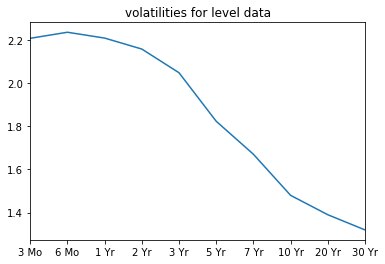

In [93]:
sd1.plot()
plt.title('volatilities for level data')
plt.show()

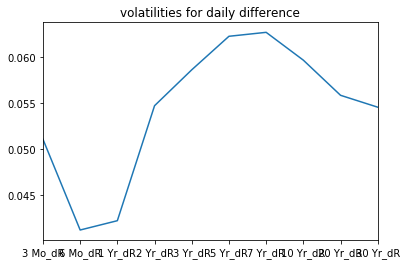

In [94]:
sd2.plot()
plt.title('volatilities for daily difference')
plt.show()